In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading the data

In [ ]:
data = pd.read_csv('siren_data_train.csv', header=None)
df = pd.DataFrame()
distances = []
heard = []
for i in range(1, len(data)):
    point_a = np.array((float(data.iloc[i, 1]), float(data.iloc[i, 2])))
    point_b = np.array((float(data.iloc[i, 6]), float(data.iloc[i, 7])))
    distance = np.linalg.norm(point_a - point_b)
    distances.append(distance)
    heard.append(int(data.iloc[i, 4]))

df['distance'] = distances
df['heard'] = heard
print(df.shape)

# Cleaning the data

In [ ]:
# Removing outliers
z = np.abs(stats.zscore(df))
threshold = 2
outlier_indices = np.where(z > threshold)[0]
df_no_outliers = df.drop(outlier_indices, axis=0)
df_no_outliers.dropna(inplace=True)

print("original shape: ", df.shape)
print("new shape: ", df_no_outliers.shape)

# Visualizing the data
We begin with a categorical scatter plot

In [ ]:

sns.stripplot(
    x='heard',
    y='distance',
    data=df_no_outliers, 
    jitter=0.3, 
    size=1.8,
    order=[1, 0],
    dodge=False,
    palette=['#1f77b4', '#ff7f0e'],
    hue='heard',
    )

As we can see, a lot of the data is concentrated at the bottom of heard=1, which suggests a relationship between the distance from the horn and the probability that the person has heard the horn. To determine if there is an existing relationship, we can fit a logistic regression curve to the data. 

Correlation coefficient: -0.5561157294514767


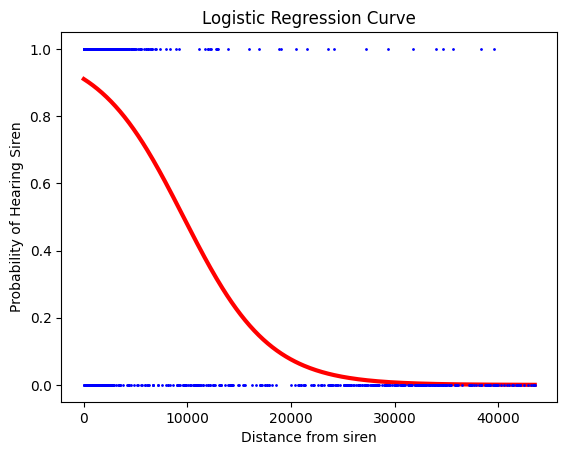

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = df_no_outliers['distance']
y = df_no_outliers['heard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train.values.reshape(-1, 1), y_train)

plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

X_sequence = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

y_proba = logreg.predict_proba(X_sequence)

correlation = df['distance'].corr(df['heard'], method='spearman')
print(f"Correlation coefficient: {correlation}")

# Plot the logistic regression curve
plt.plot(X_sequence, y_proba[:, 1], color='red', linewidth=3)

plt.title('Logistic Regression Curve')
plt.xlabel('Distance from siren')
plt.ylabel('Probability of Hearing Siren')
plt.show()



As we can see, the probability drops off the further away from the horn you go. In addition, the Spearman correlation between the variables is approximately -0.56 which suggests a negative correlation. 